In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Explore data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.shape

(2000, 21)

In [6]:
list(df.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# summary of exploreed data
1) Data type is interger an float values only.
2) Shape of dataset is 2000 rows and 21 columns.
3) There is no null values in all columns.

# Cleaning the data

In [9]:
df.drop_duplicates(inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
df.shape

(2000, 21)

# Visualisation

<Axes: xlabel='ram', ylabel='count'>

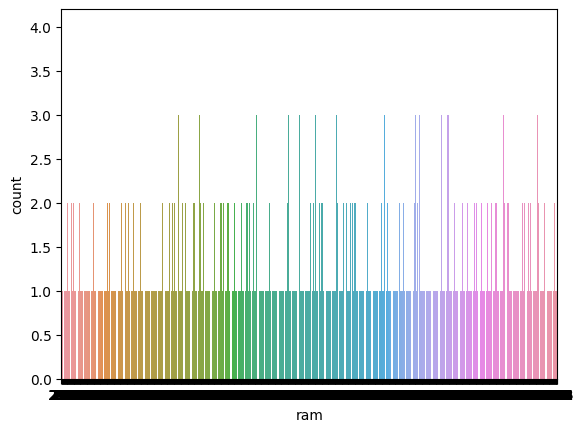

In [11]:
sns.countplot(data= df, x='ram')

In [12]:
df['ram'].value_counts()

ram
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: count, Length: 1562, dtype: int64

<Axes: xlabel='dual_sim', ylabel='count'>

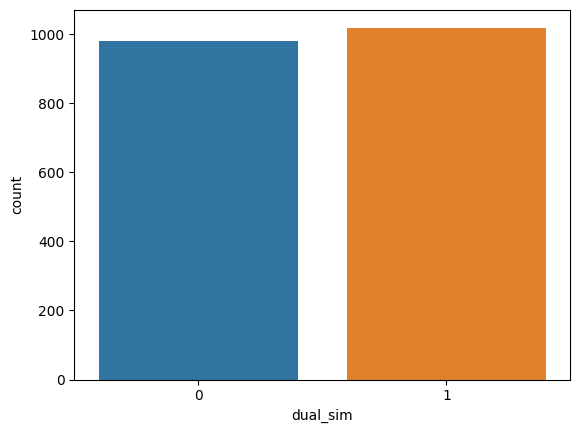

In [13]:
sns.countplot(data=df, x="dual_sim")

<Axes: xlabel='price_range', ylabel='count'>

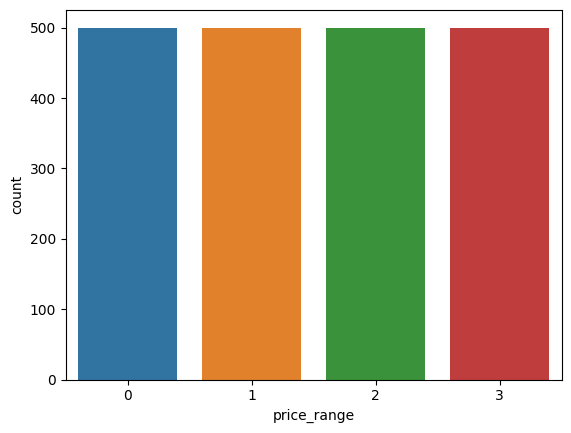

In [14]:
sns.countplot(data= df, x="price_range")

<Axes: xlabel='int_memory', ylabel='price_range'>

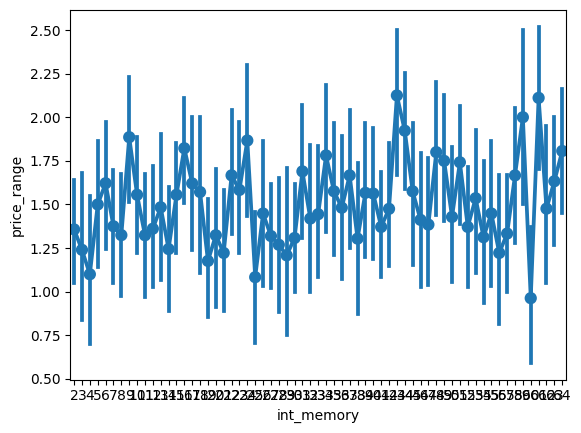

In [15]:
sns.pointplot(data=df, x="int_memory", y="price_range")

In [16]:
top_10_highest = df.nlargest(10,'price_range')
print(top_10_highest)

    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
6            1821     0          1.7         0   4       1          10    0.8   
10            769     1          2.9         1   0       0           9    0.1   
11           1520     1          2.2         0   5       1          33    0.5   
16            838     0          0.5         0   1       1          13    0.1   
17            595     0          0.9         1   7       1          23    0.1   
20            772     0          1.1         1  12       0          39    0.8   
21           1709     1          2.1         0   1       0          13    1.0   
26            519     1          1.6         1   7       1          51    0.3   
27            956     0          0.5         0   1       1          41    1.0   
30           1579     1          0.5         1   0       0           5    0.2   

    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
6         139        8  ...

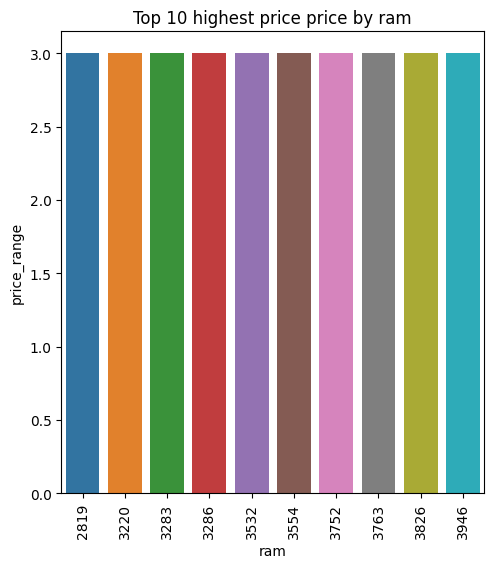

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data= top_10_highest, x='ram', y='price_range')
plt.xlabel('ram')
plt.ylabel('price_range')
plt.title('Top 10 highest price price by ram')
plt.xticks(rotation=90)
plt.show()

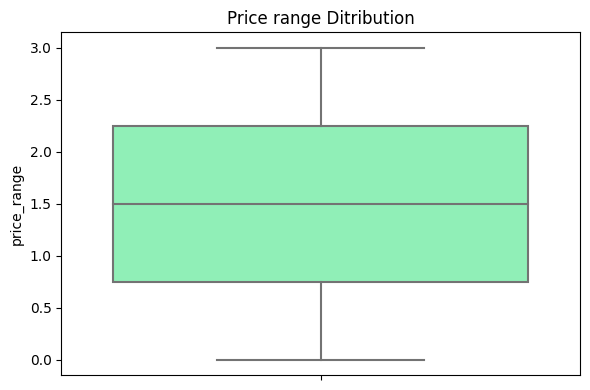

In [21]:
#using violin plot
#it help us to see both the distribution of data in terms of kernel density estimation and box plot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='price_range', palette= 'rainbow')
plt.ylabel('price_range')
plt.title('Price range Ditribution')
plt.tight_layout()
plt.show()

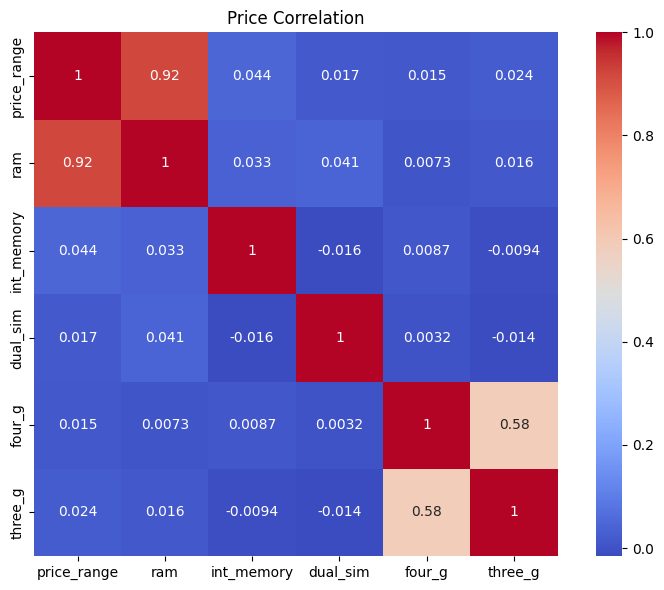

In [23]:
columns=['price_range', 'ram', 'int_memory', 'dual_sim', 'four_g', 'three_g']
price_correlation= df[columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(price_correlation, annot= True, cmap= 'coolwarm', square= True)
plt.title('Price Correlation')
plt.tight_layout()
plt.show()

INSIGHT:= Price range and ram both are interlinked while other features are independent from each other.

# Feature Engineering and Data Preprocessing

There is no null value in the dataset.
There is no outliers in the price range.

In [27]:
# Scaling your data
from sklearn.preprocessing import StandardScaler



# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[['ram','four_g','three_g']])

# Print the scaled data
for item in scaled_data:
    print(item[0])

0.3917034064711061
0.4673170183062863
0.44149773621622473
0.5945691943215896
-0.6576659870463955
-0.9748743098671516
1.010444059415081
-1.3132913286904584
-0.9453665589070812
-1.4857272483633694
1.6799011593216768
1.569247093221413
-0.5921956646037394
0.512500761963894
-1.614823658813677
-1.4350108014007485
1.318431210060815
1.5010104191262503
-0.2666882868254634
0.19621455636064006
0.6406750551966995
1.0685374441177196
-0.6373794082613471
-1.0025378263922176
0.4230553918661808
0.6065567181491183
1.5111537085187745
1.071303795770226
0.2294107761907192
-1.5180013509759462
1.2981446312757667
-1.4903378344508804
0.09478166243539826
1.586767320353955
-0.795061452454223
-0.7360459505340823
-0.010339700359852325
1.2031665578730404
0.9634160813224689
0.023778636687729005
0.3317657873334632
1.1201760082978427
-0.22703724647286888
-0.4566444336309162
-1.4940263033208891
-0.8964943463794647
1.3488610782383876
0.15840775044304994
-0.7876845147142053
1.0270421693301206
-0.06013403010497102
-0.0656

Splitting the data

In [28]:
X = df.drop('price_range',axis=1)
y = df['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model-1

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.9625
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[105   4   0   0]
 [  1  86   2   0]
 [  0   6  99   1]
 [  0   0   1  95]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.99      0.96      0.98       109
           1       0.90      0.97      0.93        89
           2       0.97      0.93      0.95       106
           3       0.99      0.99      0.99        96

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



# Model-2 Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8825
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[103   6   0   0]
 [  2  80   7   0]
 [  0  14  84   8]
 [  0   0  10  86]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.80      0.90      0.85        89
           2       0.83      0.79      0.81       106
           3       0.91      0.90      0.91        96

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



# Model- 3 SVM (Support Vector Machine)

In [35]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [36]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.88
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[98 11  0  0]
 [ 2 82  5  0]
 [ 0 15 86  5]
 [ 0  0 10 86]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.98      0.90      0.94       109
           1       0.76      0.92      0.83        89
           2       0.85      0.81      0.83       106
           3       0.95      0.90      0.92        96

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



# Model- 4 KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[72 34  3  0]
 [25 44 20  0]
 [10 41 43 12]
 [ 1 10 44 41]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.67      0.66      0.66       109
           1       0.34      0.49      0.40        89
           2       0.39      0.41      0.40       106
           3       0.77      0.43      0.55        96

    accuracy                           0.50       400
   macro avg       0.54      0.50      0.50       400
weighted avg       0.55      0.50      0.51       400



# MODEL-5 Naive-Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [40]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[97 12  0  0]
 [ 4 68 17  0]
 [ 0 25 73  8]
 [ 0  0 14 82]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.96      0.89      0.92       109
           1       0.65      0.76      0.70        89
           2       0.70      0.69      0.70       106
           3       0.91      0.85      0.88        96

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



# Model-6 Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8475
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[99 10  0  0]
 [ 8 69 12  0]
 [ 0  9 88  9]
 [ 0  0 13 83]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.93      0.91      0.92       109
           1       0.78      0.78      0.78        89
           2       0.78      0.83      0.80       106
           3       0.90      0.86      0.88        96

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.85       400
weighted avg       0.85      0.85      0.85       400



# Conclusion

Logistic Regression performs better in this case which has 96% of accuracy rate.